# Sentiment Analysis Poltik Indonesia

# Data & Algoritma Understanding

## 1. Data Understanding

### 1.1 Deskripsi Dataset
- 🌎 **Sumber Dataset** : https://drive.google.com/file/d/1XEsFtXjyhKe-q3Muey-NxeSvoavuwj3B/view?usp=drive_link
- 📐 **Ukuran Dataset** : <strong>3</strong> fitur/kolom dan <strong>1.814</strong> baris data
- 🧩 **Fitur/Variabel** :
<br>`unnamed:0`  : Kolom indeks (tidak relevan untuk analysis)
<br>`sentimen` : Label sentimen (`netral`, `negatif`, `positif`)
<br>`tweet`    : Teks tweet (campuran formal, informal, dan slang)

### 1.2 Contoh Data
| sentimen | tweet |
|----------|-------|
|`netral`|Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp|
|`negatif`|Kata @prabowo Indonesia tidak dihargai bangsa asing!   Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦|
|`positif`|Masa tenang msih ngoceh aja..ttp jokowi harga mati...|

### 1.3 Karakteristik Data
#### **Linguistik**
- 📖 **Bahasa** : Indonesia (Campuran formal, informal, dan slang)
- ☢️ **Noise** : <br>- Karakter Khusus <br>- Mention <br>- URL <br>- Hastag
- 🤟**Slang/Kata tidak baku**

#### **Sentimen**
- ✔️ `netral` : Berisi pendapat netral terhadap pemerintahan/bakal calon presiden
- ➖ `negatif` : Berisi kritik/sindiran terhadap pemerintahan/bakal calon presiden
- ➕ `positif` :  Berisi pujian/dukungan terhadap pemerintah/bakal calon presiden

### 1.4 Tantangan Data
1. **Ketidakseimbangan Jumlah Fitur** <br>Adanya dominasi kelas tertentu (misal: `netral`)
2. **Kontekstual** <br>Misalkan seperti kata <strong>jokowi</strong> bisa memiliki makna `netral`, `negatif`, ataupun `positif`.
3. **Noise Tinggi** <br>Karakter tidak terbaca, typo, dan slang.
4. **Ambiguitas**

## 2. Algoritma Understanding

### 2.1 Preprocessing Algorithms
- Regular Expressions (<strong>Regex</strong>) <br>
&emsp;Untuk membersihkan noise dari text seperti mention, URL, dan karakter non-ASCII
- Stopwords (<strong>NLTK</strong>) <br>
&emsp;Library sastrawi dipilih untuk digunakan karena dataset yang akan dianalisis menggunakan bahasa indonesia dan libary yang umum digunakan adalah sasstrawi
- Stemming (<strong>Sastrawi</strong>) <br>
&emsp;Sama seperti stopwords karena menggunakan bahasa indonesia jadi library yang digunakan adalah <strong>Sastrawi</strong>. Mengapa tidak lematization? karena kalau lematization mengacu pada kamus sedangkan jika dilihat dari dataset banyak menggunakan kata informal dan slang.
- Text Tokenization (<strong>Word Tokenization</strong>) <br>
&emsp;Text tokenization yang digunakan adalah <strong>Word Tokenization</strong> karena data di dalam fitur relatif pendek dan cocok menggunakan <strong>Word Tokenization</strong>.
- Text Vektorization (<strong>TF-IDF</strong>) <br>
&emsp;Menggunakan Frequency Based khususnya TF-IDF karena kita menghitung frekunsi kemunculan fitur untuk melihat sentiment dari dataset tweetnya. 

## 3. Text Preprocessing

#### Load Dataset

In [29]:
import pandas as pd

df = pd.read_csv('./tweet.csv')

#### 3.1 Informasi Dataset

- Melihat 5 data teratas di dataset

In [30]:
df.head()

,Unnamed: 0,sentimen,tweet
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...


- Melihat apakah ada nilai yang NULL di setiap fitur/kolom.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1815 non-null   int64 
 1   sentimen    1815 non-null   object
 2   tweet       1815 non-null   object
dtypes: int64(1), object(2)
memory usage: 42.7+ KB


- Melihat statistik deskriptif dataset

In [32]:
df.describe()

,Unnamed: 0
count,1815.000000
mean,907.000000
std,524.089687
min,0.000000
25%,453.500000
50%,907.000000
75%,1360.500000
max,1814.000000


- Melihat distribusi sentimen

Text(0.5, 1.0, 'Distribusi Sentimen')

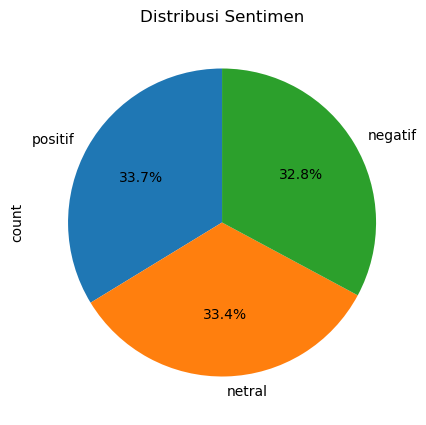

In [33]:
import matplotlib.pyplot as plt

df['sentimen'].value_counts().plot(kind='pie'.format(), figsize=(5, 5), autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Sentimen')

#### 3.2 Data Cleaning

- Delete fitur/kolom yang tidak diperlukan

In [34]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,sentimen,tweet
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,negatif,Negara kita ngutang buat bngun infrastruktur y...


In [35]:
import nltk
nltk.download('punkt')  # Untuk tokenisasi
nltk.download('punkt_tab')  # Untuk tokenisasi
nltk.download('stopwords')   # Untuk stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SUWAAAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\SUWAAAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SUWAAAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### 3.3 Text Preprocessing

- Case Normalization

In [36]:
# Ubah semua teks menjadi lowercase
df['tweet'] = df['tweet'].str.lower()
df.head()

,sentimen,tweet
0,negatif,kata @prabowo indonesia tidak dihargai bangsa ...
1,netral,"batuan langka, tasbih jokowi hadiah dari habib..."
2,netral,"di era jokowi, ekonomi indonesia semakin baik...."
3,positif,"bagi sumatera selatan, asian games berdampak p..."
4,negatif,negara kita ngutang buat bngun infrastruktur y...


- Word Tokenization

In [37]:
from nltk.tokenize import word_tokenize

df['tweet_tokenized'] = df['tweet'].apply(word_tokenize)
print(df['tweet_tokenized'].head())

0    [kata, @, prabowo, indonesia, tidak, dihargai,...
1    [batuan, langka, ,, tasbih, jokowi, hadiah, da...
2    [di, era, jokowi, ,, ekonomi, indonesia, semak...
3    [bagi, sumatera, selatan, ,, asian, games, ber...
4    [negara, kita, ngutang, buat, bngun, infrastru...
Name: tweet_tokenized, dtype: object


- Stopwords (NLTK)

In [38]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))
df['tweet_no_stopwords'] = df['tweet_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
print(df['tweet_no_stopwords'].head())

0    [@, prabowo, indonesia, dihargai, bangsa, asin...
1    [batuan, langka, ,, tasbih, jokowi, hadiah, ha...
2    [era, jokowi, ,, ekonomi, indonesia, ., #, 01i...
3    [sumatera, selatan, ,, asian, games, berdampak...
4    [negara, ngutang, bngun, infrastruktur, udah, ...
Name: tweet_no_stopwords, dtype: object


- Stemming (<strong>Sastrawi</strong>)

In [39]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['tweet_stemmed'] = df['tweet_no_stopwords'].apply(lambda x: [stemmer.stem(word) for word in x])
print(df['tweet_stemmed'].head())

0    [, prabowo, indonesia, harga, bangsa, asing, ,...
1    [batu, langka, , tasbih, jokowi, hadiah, habib...
2    [era, jokowi, , ekonomi, indonesia, , , 01indo...
3    [sumatera, selatan, , asi, games, dampak, pd, ...
4    [negara, ngutang, bngun, infrastruktur, udah, ...
Name: tweet_stemmed, dtype: object


In [40]:
df['tweet_process'] = df['tweet_stemmed'].apply(lambda x: ' '.join(x))
print(df['tweet_process'].head())

0     prabowo indonesia harga bangsa asing  berita ...
1    batu langka  tasbih jokowi hadiah habib luthfi...
2    era jokowi  ekonomi indonesia   01indonesiamaj...
3    sumatera selatan  asi games dampak pd ekonomi ...
4    negara ngutang bngun infrastruktur udah dipake...
Name: tweet_process, dtype: object


- Regex Tokenization

In [42]:
import re
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Hapus URL
    text = re.sub(r'@\w+', '', text)  # Hapus Mention
    text = re.sub(r'[^\w\s]', '', text)   # Hapus Karakter Khusus
    text = re.sub(r'\d+', '', text)   # Hapus Angka
    return text
df['tweet'] = df['tweet'].apply(clean_text)
df.head(10)

,sentimen,tweet,tweet_tokenized,tweet_no_stopwords,tweet_stemmed,tweet_process
0,negatif,kata indonesia tidak dihargai bangsa asing ...,"[kata, @, prabowo, indonesia, tidak, dihargai,...","[@, prabowo, indonesia, dihargai, bangsa, asin...","[, prabowo, indonesia, harga, bangsa, asing, ,...",prabowo indonesia harga bangsa asing berita ...
1,netral,batuan langka tasbih jokowi hadiah dari habib ...,"[batuan, langka, ,, tasbih, jokowi, hadiah, da...","[batuan, langka, ,, tasbih, jokowi, hadiah, ha...","[batu, langka, , tasbih, jokowi, hadiah, habib...",batu langka tasbih jokowi hadiah habib luthfi...
2,netral,di era jokowi ekonomi indonesia semakin baik i...,"[di, era, jokowi, ,, ekonomi, indonesia, semak...","[era, jokowi, ,, ekonomi, indonesia, ., #, 01i...","[era, jokowi, , ekonomi, indonesia, , , 01indo...",era jokowi ekonomi indonesia 01indonesiamaj...
3,positif,bagi sumatera selatan asian games berdampak pd...,"[bagi, sumatera, selatan, ,, asian, games, ber...","[sumatera, selatan, ,, asian, games, berdampak...","[sumatera, selatan, , asi, games, dampak, pd, ...",sumatera selatan asi games dampak pd ekonomi ...
4,negatif,negara kita ngutang buat bngun infrastruktur y...,"[negara, kita, ngutang, buat, bngun, infrastru...","[negara, ngutang, bngun, infrastruktur, udah, ...","[negara, ngutang, bngun, infrastruktur, udah, ...",negara ngutang bngun infrastruktur udah dipake...
5,netral,yg bisikin pak jokowi cm mikirin perputaran du...,"[yg, bisikin, pak, jokowi, ,, cm, mikirin, per...","[yg, bisikin, jokowi, ,, cm, mikirin, perputar...","[yg, bisikin, jokowi, , cm, mikirin, putar, du...",yg bisikin jokowi cm mikirin putar duit golon...
6,positif,masa tenang msih ngoceh ajattp jokowi harga mati,"[masa, tenang, msih, ngoceh, aja, .., ttp, jok...","[tenang, msih, ngoceh, aja, .., ttp, jokowi, h...","[tenang, msih, ngoceh, aja, , ttp, jokowi, har...",tenang msih ngoceh aja ttp jokowi harga mati
7,positif,uasdifitnahkejibalasditps kerjasa ekonomi bi...,"[#, uasdifitnahkejibalasditps, kerjasa, ekonom...","[#, uasdifitnahkejibalasditps, kerjasa, ekonom...","[, uasdifitnahkejibalasditps, kerjasa, ekonomi...",uasdifitnahkejibalasditps kerjasa ekonomi bil...
8,netral,iya bener aa kita mantap kan pilihan ke pemimp...,"[iya, bener, aa, ,, kita, mantap, kan, pilihan...","[iya, bener, aa, ,, mantap, pilihan, pemimpin,...","[iya, bener, aa, , mantap, pilih, pimpin, yg, ...",iya bener aa mantap pilih pimpin yg bs solusi...
9,negatif,prabowosandi sepakat tak ambil gaji karena neg...,"[prabowo-sandi, sepakat, tak, ambil, gaji, kar...","[prabowo-sandi, sepakat, ambil, gaji, negara, ...","[prabowo-sandi, sepakat, ambil, gaji, negara, ...",prabowo-sandi sepakat ambil gaji negara susah ...


- Text Vectorization

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['tweet_process'])
print('Shape TF-IDF: ', X.shape)

Shape TF-IDF:  (1815, 6417)


In [ ]:
# Cek hasil TF-IDF
print(df[['tweet', 'tweet_process']].head(10))

                                               tweet  \
0  kata  indonesia tidak dihargai bangsa asing   ...   
1  batuan langka tasbih jokowi hadiah dari habib ...   
2  di era jokowi ekonomi indonesia semakin baik i...   
3  bagi sumatera selatan asian games berdampak pd...   
4  negara kita ngutang buat bngun infrastruktur y...   
5  yg bisikin pak jokowi cm mikirin perputaran du...   
6   masa tenang msih ngoceh ajattp jokowi harga mati   
7  uasdifitnahkejibalasditps   kerjasa ekonomi bi...   
8  iya bener aa kita mantap kan pilihan ke pemimp...   
9  prabowosandi sepakat tak ambil gaji karena neg...   

                                       tweet_process  
0   prabowo indonesia harga bangsa asing  berita ...  
1  batu langka  tasbih jokowi hadiah habib luthfi...  
2  era jokowi  ekonomi indonesia   01indonesiamaj...  
3  sumatera selatan  asi games dampak pd ekonomi ...  
4  negara ngutang bngun infrastruktur udah dipake...  
5  yg bisikin jokowi  cm mikirin putar duit golon... 

In [ ]:
# Cek distribusi sentimen
print(df['sentimen'].value_counts())

sentimen
positif    612
netral     607
negatif    596
Name: count, dtype: int64


In [47]:
# Save hasil proses 
df.to_csv('tweet_preprocess_tfidf.csv', index=False)
print('Data disimpan ke "tweet_preprocess_tfidf.csv"')

Data disimpan ke "tweet_preprocess_tfidf.csv"


<br><br>